<a href="https://colab.research.google.com/github/Bharathkumar1404/LLM-Assignment/blob/main/220186478.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**

In [70]:
#installing the transformer and datasets
!pip install transformers datasets
#installing the torch library
!pip install torch

In [71]:
#installing the torch library
!pip install torch

In [72]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="bert-base-uncased")
pipe("I need to go to college Asap but, I miss the bus")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_0', 'score': 0.5551221370697021}]

In [73]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [74]:
from datasets import load_dataset

R8_ds = load_dataset("dxgp/R8")

In [75]:
train_R8 = R8_ds["train"]
train_R8[0]

{'Unnamed: 0': 5162,
 'text': 'swedish prime minister s china visit boosts trade an big expansion in bilateral trade is expected as a result of swedish prime minister ingvar carlsson s visit to china a official of china s foreign economic relations and trade ministry official said he told the china daily that petroleum coal cotton non ferrous metals and electric engines could help balance the trade running at over three to one in sweden s favour total trade reached mln dlrs last year up pct on according to chinese statistics swedish sources said major paper mill projects and an aviation agreement would be discussed during carlsson s one week visit reuter',
 'label': 7}

In [76]:
train_R8.features

{'Unnamed: 0': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None)}

In [77]:
# Convert the dataset's train, test, or validation split to pandas DataFrame
train_R8 = R8_ds['train'].to_pandas()
test_R8 = R8_ds['test'].to_pandas()
val_R8 = R8_ds['validation'].to_pandas()

In [78]:
# Remove the 'Unnamed: 0' column
train_R8 = train_R8.drop(columns=['Unnamed: 0'])
test_R8 = test_R8.drop(columns=['Unnamed: 0'])
val_R8 = val_R8.drop(columns=['Unnamed: 0'])

print(train_R8.head(10))


                                                text  label
0  swedish prime minister s china visit boosts tr...      7
1  gaf gaf seeks all of borg warner bor gaf corp ...      0
2  mcclain industries inc mccl st qtr dec net shr...      2
3  foothill group fgi sees better first quarter d...      2
4  tenneco tgt buys unisys uis unit tenneco inc s...      0
5  carling o keefe ckb sells oil unit takes gain ...      0
6  reuters to buy i p sharp of canada reuters hol...      0
7  wardair international ltd year net shr dlrs vs...      2
8  borg warner bor to sell unit for mln dlrs borg...      0
9  nvhomes nvh sets two for one split nvhomes lp ...      2


In [79]:
# count the label class into dictionary
labels = train_R8['label'].replace([0,1,2,3,4,5,6,7], ['acquistion', 'crude','earn','grain','interest','money-fx','ship','trade']).value_counts().to_dict()
print(train_R8)

                                                   text  label
0     swedish prime minister s china visit boosts tr...      7
1     gaf gaf seeks all of borg warner bor gaf corp ...      0
2     mcclain industries inc mccl st qtr dec net shr...      2
3     foothill group fgi sees better first quarter d...      2
4     tenneco tgt buys unisys uis unit tenneco inc s...      0
...                                                 ...    ...
4931  marcus mrcs votes pct stock dividend marcus co...      2
4932  protocomdevices prcm sees more profit erosion ...      2
4933  franklin minnesota insured sets payout mthly d...      2
4934  varity vat expects th qtr full year loss varit...      2
4935  n z trade surplus mln dlrs in february prelimi...      7

[4936 rows x 2 columns]


In [111]:
import plotly.graph_objects as go

def plot_label_distribution(labels):
    """
    Creates and displays a bar chart and a pie chart for label distribution.

    Parameters:
    - labels: A dictionary where keys are label names and values are label counts.
    """
    x = list(labels.keys())  # Extract label names
    y = list(labels.values())  # Extract label counts

    # Create and display the bar chart
    fig = go.Figure(data=go.Bar(x=x, y=y))
    fig.update_layout(title='Label Distribution - Bar Chart', xaxis_title='Labels', yaxis_title='Label Count')
    fig.show()

    # Create and display the pie chart
    fig = go.Figure(data=[go.Pie(labels=x, values=y)])
    fig.update_layout(title='Label Distribution - Pie Chart')
    fig.show()

# Example usage:

plot_label_distribution(labels)


In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text, max_words=100, background_color="white", colormap="viridis"):
    """
    Generate and display a word cloud.

    Parameters:
    - text: str, the input text from which to generate the word cloud.
    - max_words: int, maximum number of words to include in the word cloud.
    - background_color: str, background color for the word cloud image.
    - colormap: str, the color map to use for the word cloud.

    Returns:
    - Displays the word cloud.
    """
    # Create the word cloud object
    wordcloud = WordCloud(width=800, height=400,
                          max_words=max_words,
                          background_color=background_color,
                          colormap=colormap).generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Turn off axis
    plt.show()



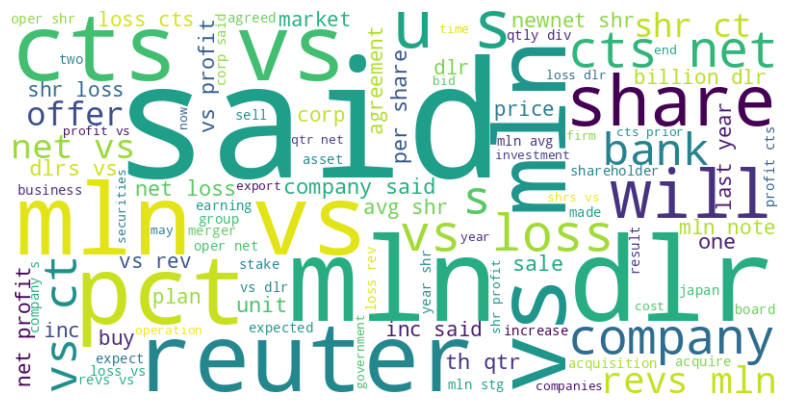

In [83]:
generate_word_cloud(' '.join(train_R8['text']))

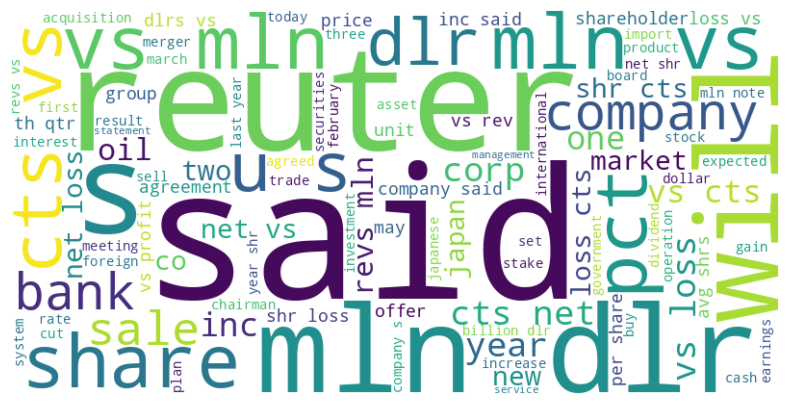

In [84]:
generate_word_cloud(' '.join(val_R8['text']))

In [85]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
tokenized_sentences_1 = tokenizer(R8_ds["train"]["text"])


Token indices sequence length is longer than the specified maximum sequence length for this model (593 > 512). Running this sequence through the model will result in indexing errors


In [86]:
inputs = tokenizer("train_R8[0:5]")
inputs

{'input_ids': [101, 3345, 1035, 1054, 2620, 1031, 1014, 1024, 1019, 1033, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [87]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['[CLS]', 'train', '_', 'r', '##8', '[', '0', ':', '5', ']', '[SEP]']

In [88]:
tokenized_dataset = tokenizer(
    R8_ds["train"]["text"],
    padding=True,
    truncation=True,
)

In [89]:
def tokenize_function(example):
    return tokenizer(example["text"], truncation=True)

In [90]:
tokenized_datasets = R8_ds.map(tokenize_function, batched=True)
tokenized_datasets

Map:   0%|          | 0/549 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4936
    })
    validation: Dataset({
        features: ['Unnamed: 0', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 549
    })
    test: Dataset({
        features: ['Unnamed: 0', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2189
    })
})

In [91]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")

In [92]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=8)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [95]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
)

In [96]:
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

(549, 8) (549,)


In [97]:
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [98]:
!pip install evaluate

In [ ]:
#import evaluate

#metric = evaluate.load("accuracy")
#metric.compute(predictions=preds, references=predictions.label_ids)

In [99]:
def compute_metrics(eval_preds):
    metric = evaluate.load("accuracy")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [100]:
training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=8,ignore_mismatched_sizes=True)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [101]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.284100,0.129357,0.970856
2,0.082300,0.112378,0.976321
3,0.037700,0.119906,0.972678


TrainOutput(global_step=1851, training_loss=0.11579199934701286, metrics={'train_runtime': 443.6466, 'train_samples_per_second': 33.378, 'train_steps_per_second': 4.172, 'total_flos': 2459801540626176.0, 'train_loss': 0.11579199934701286, 'epoch': 3.0})

In [102]:
pred = trainer.predict(tokenized_datasets['test'])
true = tokenized_datasets['test']['label']

In [103]:
pred = pred.predictions.argmax(axis=-1)

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true, pred)

array([[ 681,    2,   11,    0,    1,    1,    0,    0],
       [   1,  119,    0,    0,    0,    0,    1,    0],
       [   2,    0, 1078,    0,    1,    2,    0,    0],
       [   0,    0,    0,    9,    1,    0,    0,    0],
       [   0,    0,    0,    0,   74,    7,    0,    0],
       [   0,    0,    1,    0,    4,   78,    0,    4],
       [   0,    1,    0,    0,    0,    0,   35,    0],
       [   0,    0,    0,    0,    0,    0,    0,   75]])

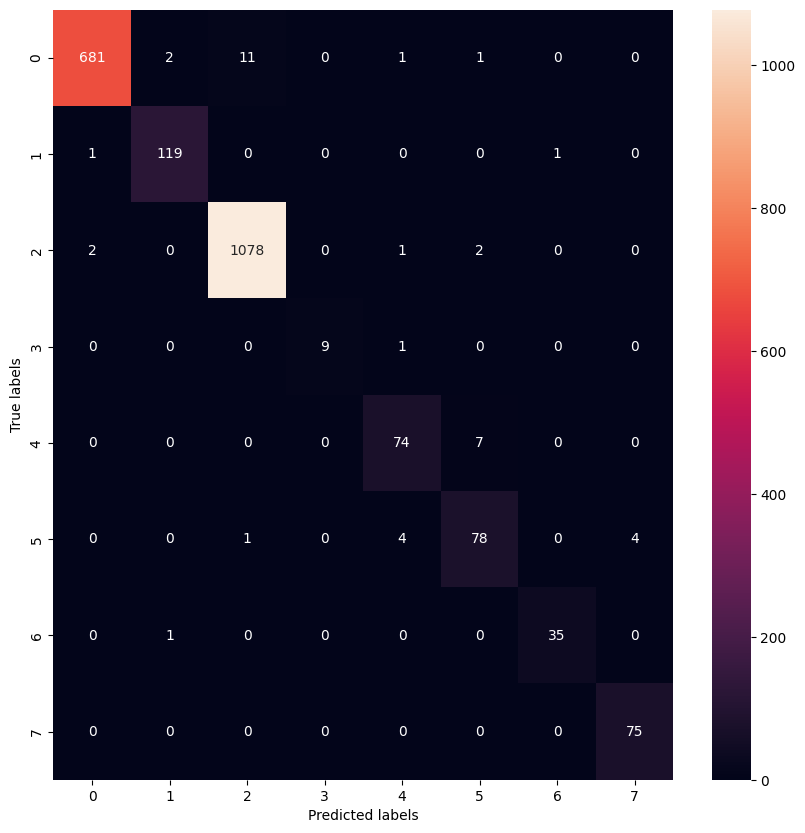

In [105]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(true, pred), annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [106]:
from sklearn.metrics import classification_report

print(classification_report(true, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       696
           1       0.98      0.98      0.98       121
           2       0.99      1.00      0.99      1083
           3       1.00      0.90      0.95        10
           4       0.91      0.91      0.91        81
           5       0.89      0.90      0.89        87
           6       0.97      0.97      0.97        36
           7       0.95      1.00      0.97        75

    accuracy                           0.98      2189
   macro avg       0.96      0.95      0.96      2189
weighted avg       0.98      0.98      0.98      2189



In [107]:
tokenized_datasets['test']

Dataset({
    features: ['Unnamed: 0', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2189
})

In [108]:
test = tokenize_function(tokenized_datasets['test'])

In [109]:
tokenized_datasets['test'].features

{'Unnamed: 0': Value(dtype='int64', id=None),
 'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [110]:
# Select a few examples to display
num_examples = 5  # Number of examples to print
for i in range(num_examples):
    # Decode the input IDs to text
    input_ids = tokenized_datasets['test']['input_ids'][i]
    original_text = tokenizer.decode(input_ids, skip_special_tokens=True)

    # Get the true and predicted labels
    true_label = true[i]
    predicted_label = pred[i]

    # Print the example
    print(f"Example {i+1}:")
    print(f"Original Text: {original_text}")
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")
    print("-" * 50)

Example 1:
Original Text: asian exporters fear damage from u s japan rift mounting trade friction between the u s and japan has raised fears among many of asia s exporting nations that the row could inflict far reaching economic damage businessmen and officials said they told reuter correspondents in asian capitals a u s move against japan might boost protectionist sentiment in the u s and lead to curbs on american imports of their products but some exporters said that while the conflict would hurt them in the long run in the short term tokyo s loss might be their gain the u s has said it will impose mln dlrs of tariffs on imports of japanese electronics goods on april in retaliation for japan s alleged failure to stick to a pact not to sell semiconductors on world markets at below cost unofficial japanese estimates put the impact of the tariffs at billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of products hit by the new taxes we wouldn t 